<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.5240 - loss: 0.6976 - val_accuracy: 0.5796 - val_loss: 0.6587
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6558 - loss: 0.6101 - val_accuracy: 0.6342 - val_loss: 0.6384
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.7641 - loss: 0.4869 - val_accuracy: 0.7646 - val_loss: 0.5019
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7622 - loss: 0.5088
SimpleRNN Test accuracy: 0.7645999789237976
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 223ms/step - accuracy: 0.6931 - loss: 0.5500 - val_accuracy: 0.8429 - val_loss: 0.3635
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 218ms/step - accuracy: 0.8971 - loss: 0.2608 - val_accuracy: 0.8476 - val_loss: 0.3429
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.9502 - loss: 0.1419 - val_accuracy: 0.8339 - val_loss: 0.4568
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8316 - loss: 0.4671
GRU Test accuracy: 0.83

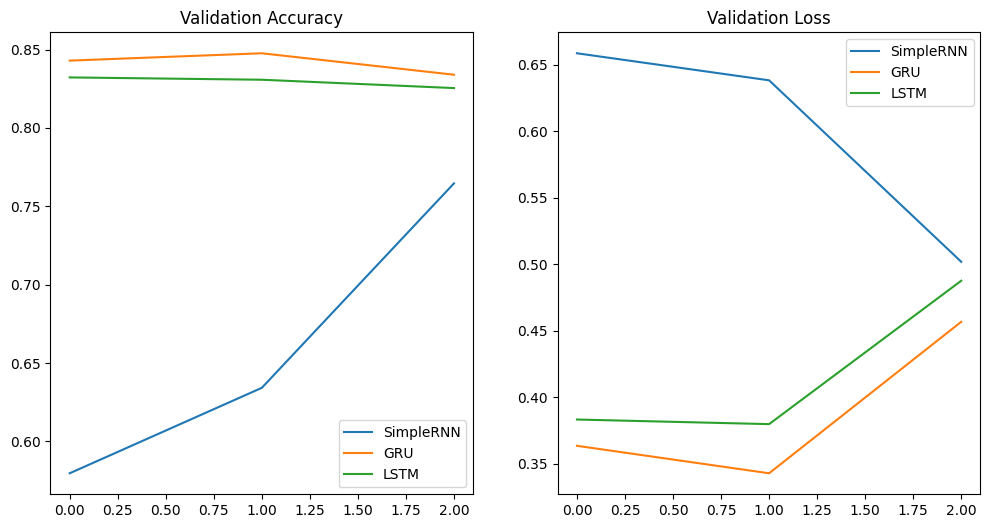

In [2]:
# Problem 1: Execution of various methods

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.datasets import imdb

# Loading and preparing data
max_features = 20000
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Function to create and evaluate models
def evaluate_model(model_type, epochs=3):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'GRU':
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'LSTM':
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print(f'{model_type} Test accuracy:', acc)
    return history

# Evaluating all models
rnn_history = evaluate_model('SimpleRNN')
gru_history = evaluate_model('GRU')
lstm_history = evaluate_model('LSTM')

# Plotting comparison of the Models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['val_accuracy'], label='SimpleRNN')
plt.plot(gru_history.history['val_accuracy'], label='GRU')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['val_loss'], label='SimpleRNN')
plt.plot(gru_history.history['val_loss'], label='GRU')
plt.plot(lstm_history.history['val_loss'], label='LSTM')
plt.title('Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 190s 18s/step - loss: 0.8366 - val_loss: 0.6742
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


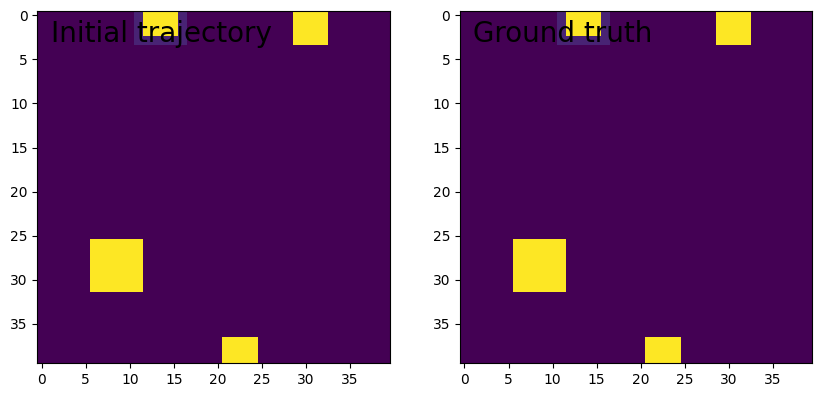

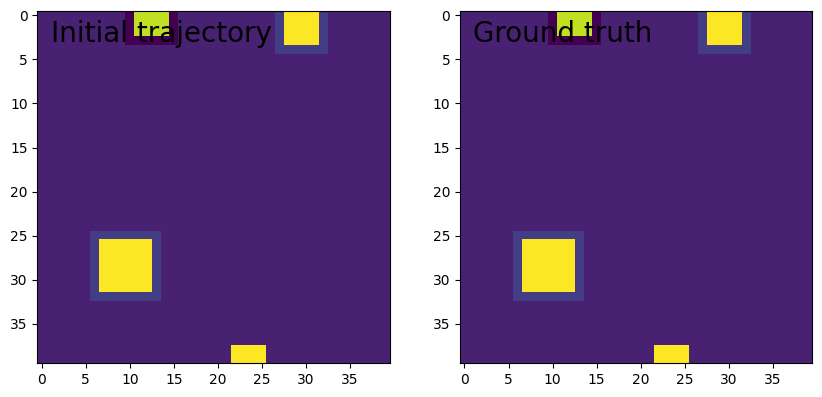

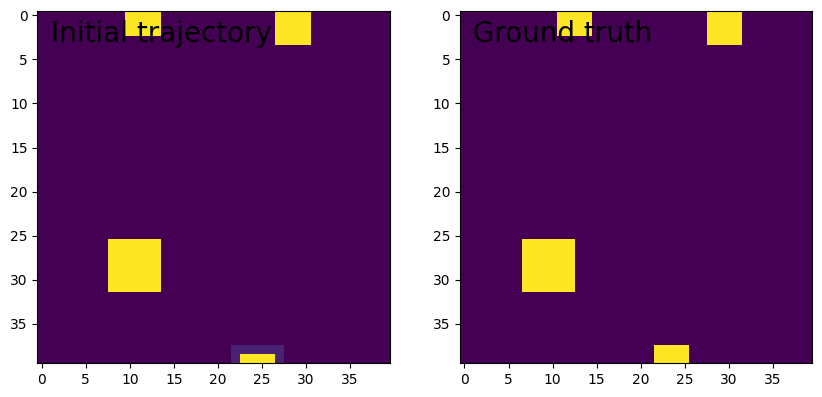

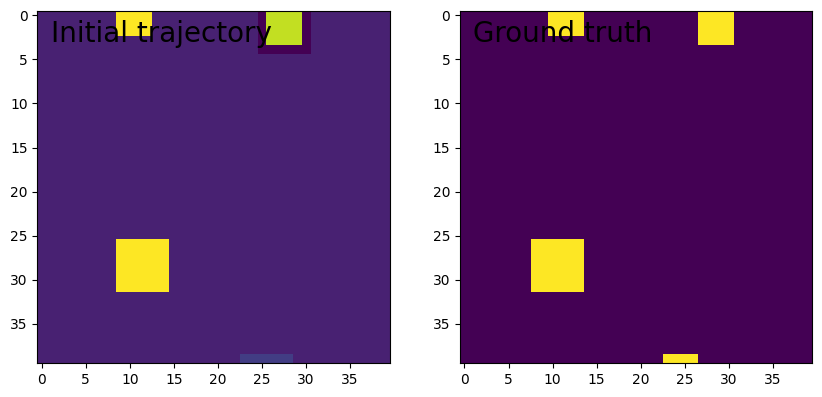

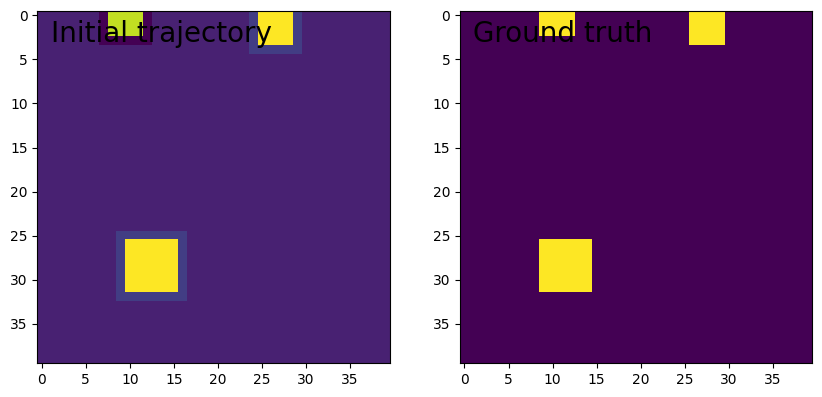

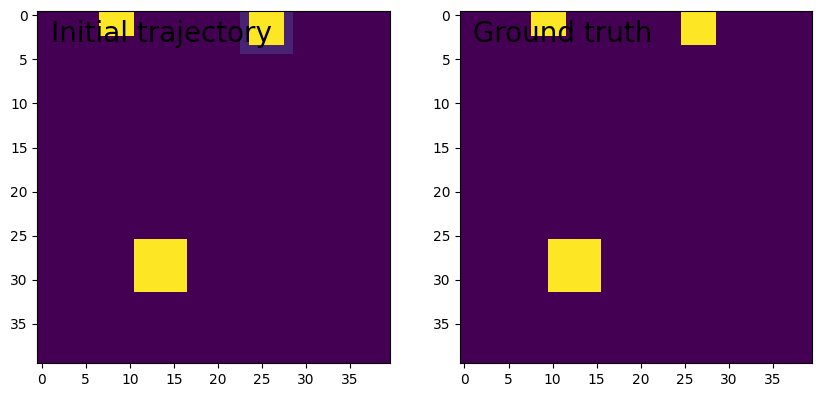

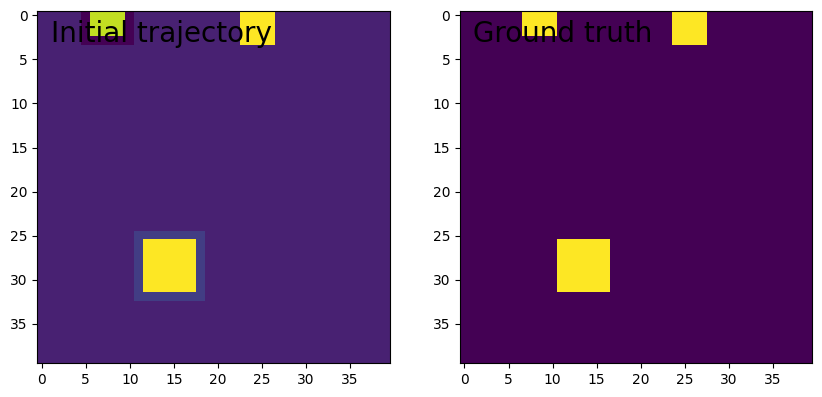

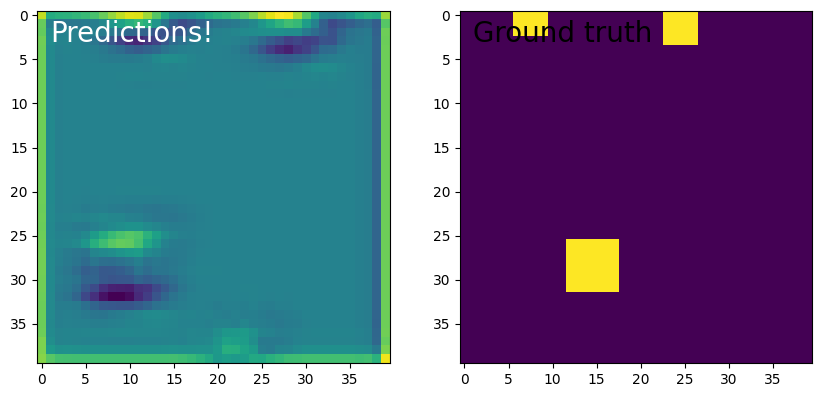

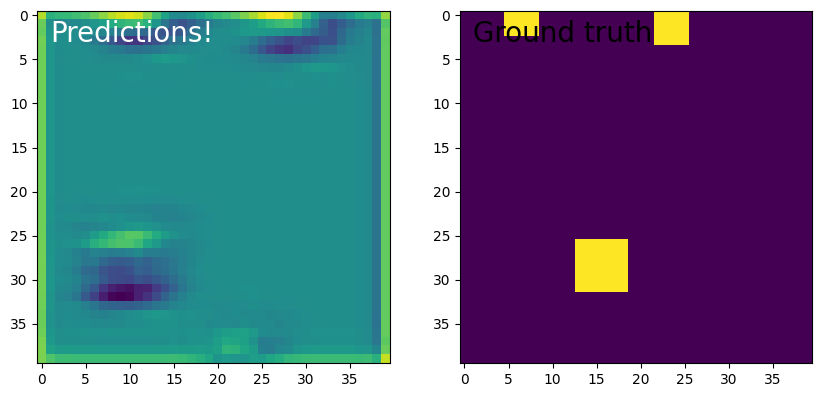

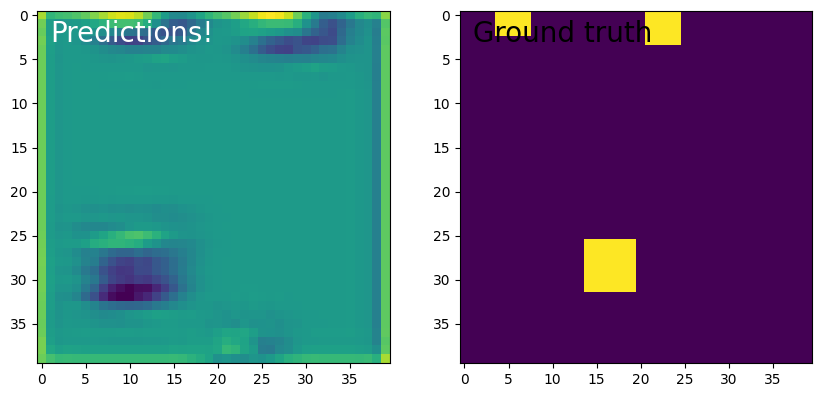

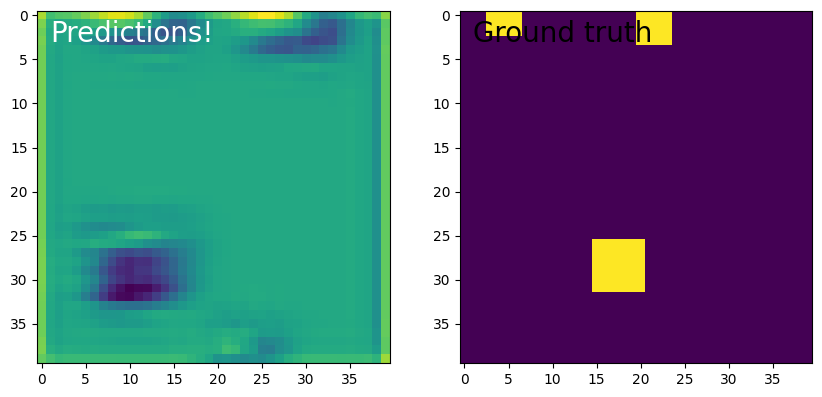

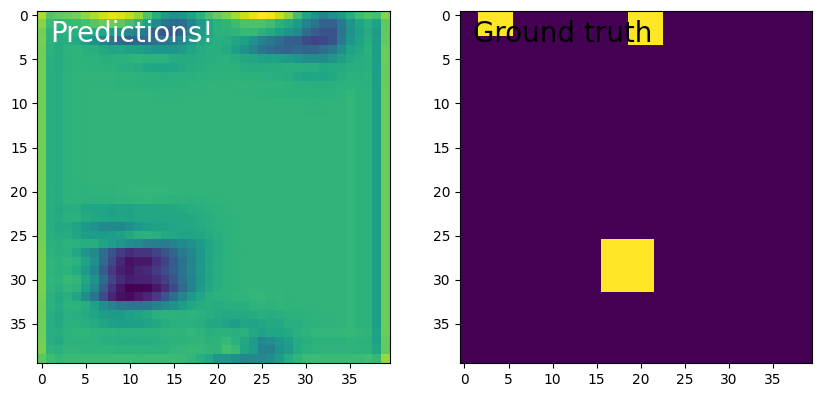

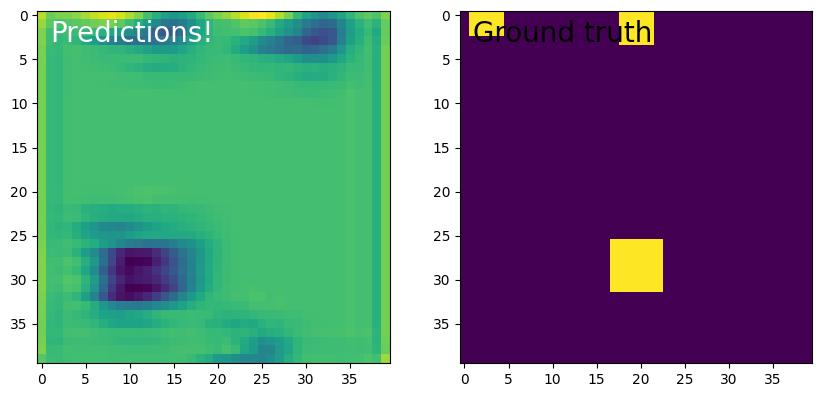

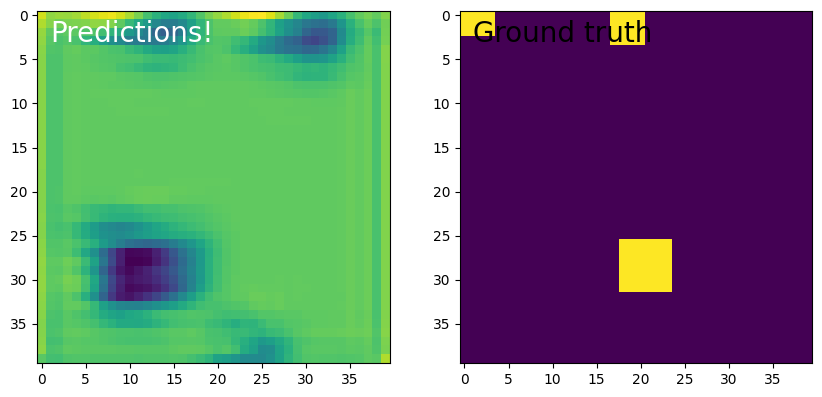

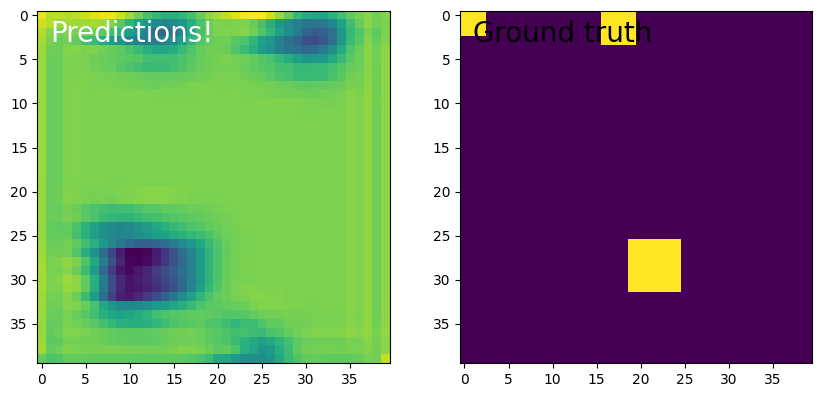

In [5]:
#Implementing ConvLSTM2D

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, ConvLSTM2D, BatchNormalization
from tensorflow import keras

# Generating synthetic video data
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float32)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float32)

    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift-w:x_shift+w, y_shift-w:y_shift+w, 0] += 1

                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t, x_shift-w-1:x_shift+w+1, y_shift-w-1:y_shift+w+1, 0] += noise_f * 0.1

                shifted_movies[i, t, x_shift-w:x_shift+w, y_shift-w:y_shift+w, 0] += 1

    noisy_movies = noisy_movies[:, :, 20:60, 20:60, :]
    shifted_movies = shifted_movies[:, :, 20:60, 20:60, :]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1

    return noisy_movies, shifted_movies

# Generating data
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

# Creating and training ConvLSTM2D model
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

seq.compile(loss='binary_crossentropy', optimizer='adam')

# Training the model
history = seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,
                  epochs=1, validation_split=0.05)

# Visualization
index = 10
track = noisy_movies[index][:7, :, :, :]
track2 = noisy_movies[index][:, :, :, :]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, :, :, :, :])
    new = new_pos[:, -1, :, :, :]
    track = np.concatenate((track, new), axis=0)

for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions!', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, :, :, 0]
    plt.imshow(toplot)

    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, :, :, 0]
    if i >= 2:
        toplot = shifted_movies[index][i-1, :, :, 0]
    plt.imshow(toplot)

    plt.show()

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.2588 - loss: 2.9655 - val_accuracy: 0.3611 - val_loss: 2.4346
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 0.3471 - loss: 2.4271 - val_accuracy: 0.3682 - val_loss: 2.3509
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.3796 - loss: 2.3476 - val_accuracy: 0.3865 - val_loss: 2.2952
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3914 - loss: 2.2498
SimpleRNN Test accuracy: 0.38646483421325684
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 137s 469ms/step - accuracy: 0.3718 - loss: 2.4992 - val_accuracy: 0.5338 - val_loss: 1.7874
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 141s 467ms/step - accuracy: 0.5472 - loss: 1.7050 - val_accuracy: 0.5681 - val_loss: 1.6551
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 145s 477ms/step - accuracy: 0.6174 - loss: 1.5155 - val_accuracy: 0.6158 - val_loss: 1.5169
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accurac

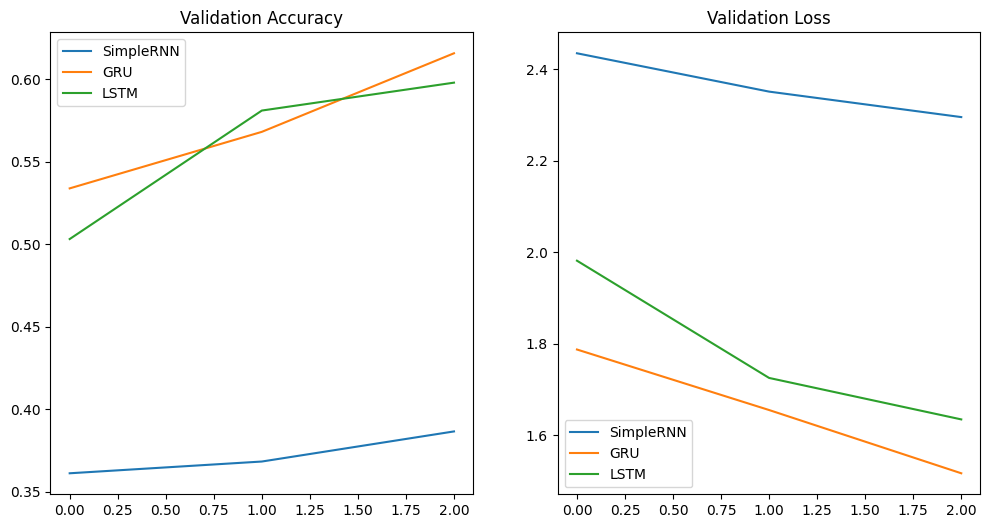

In [6]:
# Problem 2: (Advance assignment) Comparison between multiple data sets

from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM
import numpy as np
import matplotlib.pyplot as plt

# Loading Reuters dataset
max_features = 20000
maxlen = 200
batch_size = 32

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Function to create and evaluate models
def evaluate_model(model_type, epochs=3):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'GRU':
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'LSTM':
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print(f'{model_type} Test accuracy:', acc)
    return history

# Evaluating all models
rnn_history = evaluate_model('SimpleRNN')
gru_history = evaluate_model('GRU')
lstm_history = evaluate_model('LSTM')

# Plotting comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['val_accuracy'], label='SimpleRNN')
plt.plot(gru_history.history['val_accuracy'], label='GRU')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['val_loss'], label='SimpleRNN')
plt.plot(gru_history.history['val_loss'], label='GRU')
plt.plot(lstm_history.history['val_loss'], label='LSTM')
plt.title('Validation Loss')
plt.legend()
plt.show()

**Problem 3: Explanation of other classes**

**RNN:** The Keras recurrent layers base. Other recurrent layers are derived off of this class. It does the base implementation of recurrent networks but is not used very directly.

**SimpleRNNCell:** The SimpleRNN Cells class. Whereas SimpleRNN computes sequences, SimpleRNNCell has the computation logic of a single timestep. Advisable when you want more RNN loop control.

**GRUCell:** The type of cell of GRU layers. Does the Gated Recurrent Unit computation in one timestep. Similar to SimpleRNNCell and using the gating mechanisms of GRU.

**LSTMCell:** LSTM layers cell. The computation steps of a single timestep of LSTM regarding input, forget, and output gates as well as cell state.

**StackedRNNCells:** A wrapper to have many RNN cells (such as LSTMCell, GRUCell) cooperate as a single cell. convenient in building custom multi-layer RNNs leaving the single-cell interface unchanged.

**CuDNNGRU:** An efficient version of GRU implemented with the use of the CuDNN library by NVIDIA. Works only on NVIDIA GPUs and lacks configuration options to the regular GRU, but is much faster.

**CuDNNLSTM:** That works like CuDNNGRU but on LSTM networks. An implementation of LSTM that is highly optimized with CuDNN and is very fast on GPUs with NVIDIA, in comparison with regular LSTM implementation.